# KNN
- K Nearest Neighbor
- **새로운 데이터가 있을 때, 기존 데이터의 그룹 중 어느 그룹에 속하는지를 분류하는 문제**
- k는 몇 번째 가까운 데이터까지 볼 것인가를 정하는 수치


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# draw decision boundary of classification model
# it only accepts 2-d inputs with sparse labels rather than one-hot encoding
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, shading='nearest', cmap=plt.cm.Paired)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.yticks()

In [3]:
dataset=load_iris()
data = dataset['data']

In [4]:
X = data[:, :2] # get first two features for inputs
y = dataset['target'] # get target for output labels

In [5]:
model = KNeighborsClassifier(n_neighbors=1) # create KNN model with k=1
model.fit(X, y) # train model

KNeighborsClassifier(n_neighbors=1)

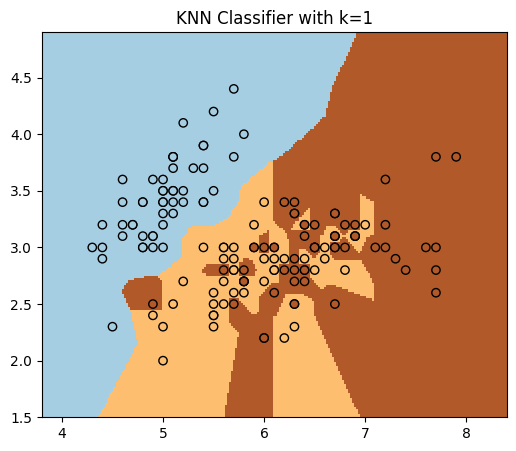

In [11]:
plt.figure(figsize=(6, 5))
plot_decision_boundary(model, X, y)
plt.title('KNN Classifier with k=1')
plt.show()

In [12]:
model = KNeighborsClassifier(n_neighbors=5) # create KNN model with k=1
model.fit(X, y) # train model

KNeighborsClassifier()

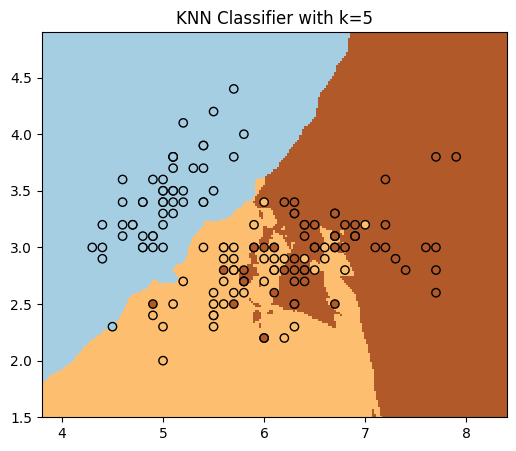

In [13]:
plt.figure(figsize=(6, 5))
plot_decision_boundary(model, X, y)
plt.title('KNN Classifier with k=5')
plt.show()

In [14]:
model = KNeighborsClassifier(n_neighbors=7) # create KNN model with k=1
model.fit(X, y) # train model

KNeighborsClassifier(n_neighbors=7)

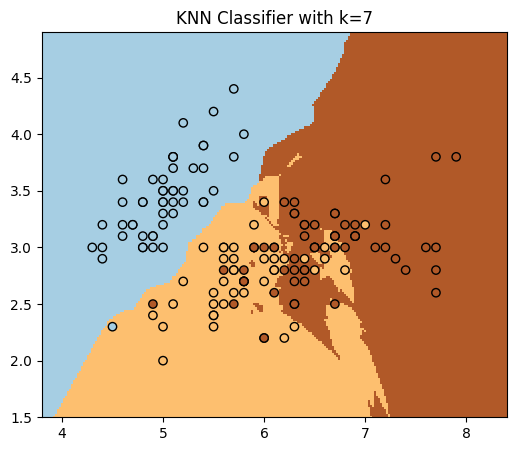

In [15]:
plt.figure(figsize=(6, 5))
plot_decision_boundary(model, X, y)
plt.title('KNN Classifier with k=7')
plt.show()

In [16]:
model = KNeighborsClassifier(n_neighbors=11) # create KNN model with k=1
model.fit(X, y) # train model

KNeighborsClassifier(n_neighbors=11)

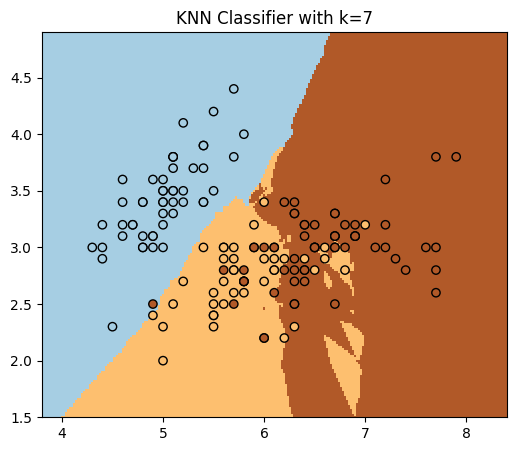

In [17]:
plt.figure(figsize=(6, 5))
plot_decision_boundary(model, X, y)
plt.title('KNN Classifier with k=7')
plt.show()

In [18]:
W = np.array([[1.0, 0.0],[0.0, 0.1]]) # 두번째 feature들의 값을 좀 줄여줌
X_tr = np.matmul(X, W)

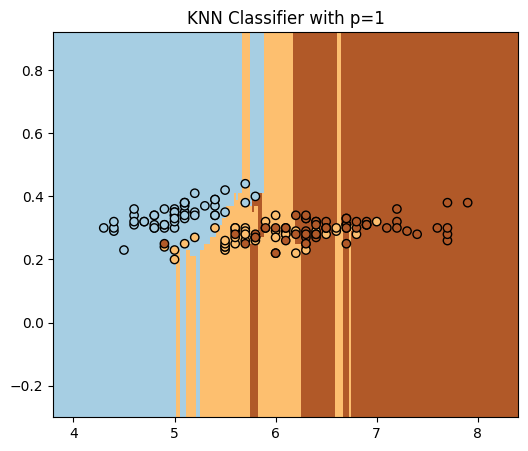

In [20]:
model = KNeighborsClassifier(n_neighbors=7, p=1) # p=1 -> manhattan distance
model.fit(X_tr, y)
plt.figure(figsize=(6, 5))
plot_decision_boundary(model, X_tr, y)
plt.title('KNN Classifier with p=1')
plt.show()

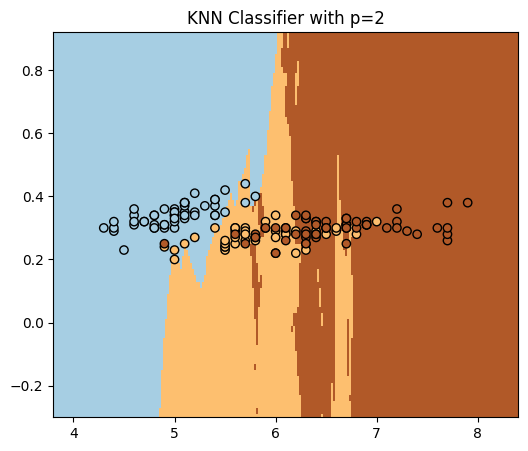

In [24]:
model = KNeighborsClassifier(n_neighbors=7, p=2) # p=2 -> Euclidean distance
model.fit(X_tr, y)
plt.figure(figsize=(6, 5))
plot_decision_boundary(model, X_tr, y)
plt.title('KNN Classifier with p=2')
plt.show()

In [23]:
def mahalanobis_dist(x0, x1, InvSigma):
    return np.sqrt((x0-x1) @ InvSigma @ np.transpose(x0-x1))

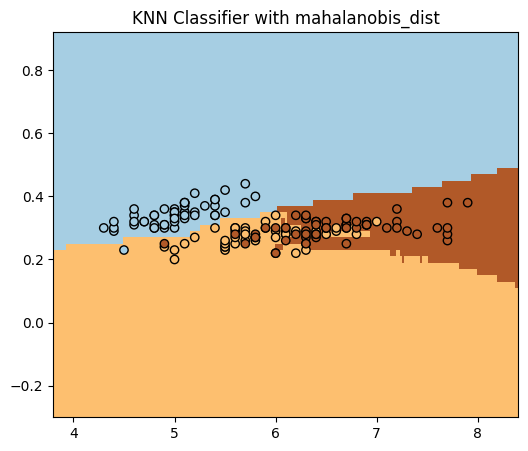

In [25]:
model = KNeighborsClassifier(n_neighbors=7, metric=mahalanobis_dist, metric_params={'InvSigma': np.linalg.inv(np.cov(np.transpose(X_tr)))})
model.fit(X_tr, y)
plt.figure(figsize=(6, 5))
plot_decision_boundary(model, X_tr, y)
plt.title('KNN Classifier with mahalanobis_dist')
plt.show()